In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Realización de prueba y modelado para la base de datos: **Regresión logistica**


## Iniciamos extrayendo la base de datos

In [4]:
file_path = "../baseCVsNUEVO.csv"  # Ajusta el path si es necesario
df = pd.read_csv(file_path)
df = df.drop(columns=["Unnamed: 0", "Fuente principal"], errors="ignore")  # errors="ignore" evita fallos si ya no existe


In [5]:
df

,Páginas,professional_profile,education,work_experience,skills,certifications,achievements,languages,projects,training_courses,...,Legibilidad,Uso de negritas,Uso de cursivas,Uso de colores (excluyendo fondo blanco y links),Porcentaje de color real en la CV,Cantidad de imágenes o gráficos,Alineación principal,Consistencia de tamaños,Consistencia de márgenes,Passed
0,2,39,28,72,98,69,0,0,13,48,...,Buena,96,35,Sí,0.11%,0,Justificado,Inconsistente,Consistente,1
1,6,306,369,80,0,57,9,4,182,389,...,Buena,52,64,No,0.0%,1,Justificado,Consistente,Inconsistente,1
2,1,26,56,10,99,0,0,65,0,23,...,Deficiente,0,0,Sí,32.12%,9,Justificado,Consistente,Consistente,1
3,1,71,14,80,28,0,0,2,0,0,...,Buena,53,0,Sí,0.98%,0,Justificado,Inconsistente,Consistente,1
4,4,70,79,0,4,0,0,229,0,123,...,Buena,111,0,Sí,3.51%,3,Justificado,Inconsistente,Inconsistente,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,6,30,50,7,0,0,18,56,395,367,...,Buena,342,173,Sí,0.08%,8,Justificado,Inconsistente,Inconsistente,0
623,10,126,329,36,24,928,130,0,409,279,...,Buena,147,148,Sí,1.18%,1,Justificado,Inconsistente,Inconsistente,0
624,3,12,15,82,23,0,228,16,34,27,...,Buena,200,0,No,0.0%,0,Justificado,Inconsistente,Inconsistente,0
625,1,20,22,33,19,0,0,30,0,14,...,Deficiente,0,0,Sí,13.61%,0,Justificado,Inconsistente,Consistente,0


### Información descriptiva

In [6]:
print(df.info())
print(df["Passed"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 30 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Páginas                                           627 non-null    int64  
 1   professional_profile                              627 non-null    int64  
 2   education                                         627 non-null    int64  
 3   work_experience                                   627 non-null    int64  
 4   skills                                            627 non-null    int64  
 5   certifications                                    627 non-null    int64  
 6   achievements                                      627 non-null    int64  
 7   languages                                         627 non-null    int64  
 8   projects                                          627 non-null    int64  
 9   training_courses     

### Transformar la variable Porcentaje de la CV

In [7]:
df["Porcentaje de color real en la CV"] = df["Porcentaje de color real en la CV"].str.replace("%", "").astype(float)


In [8]:
df[['LinkedIn', 'GitHub', 'Personal Website']] = df[['LinkedIn', 'GitHub', 'Personal Website']].astype(int)

### Identificar y transformar variables categóricas

In [9]:
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Guardar el encoder por si se necesita revertir

### Separar las bases en variables X y Y

In [10]:
X = df.drop(columns=["Passed"])
y = df["Passed"]

In [11]:
X

,Páginas,professional_profile,education,work_experience,skills,certifications,achievements,languages,projects,training_courses,...,Tamaño de fuente más usado,Legibilidad,Uso de negritas,Uso de cursivas,Uso de colores (excluyendo fondo blanco y links),Porcentaje de color real en la CV,Cantidad de imágenes o gráficos,Alineación principal,Consistencia de tamaños,Consistencia de márgenes
0,2,39,28,72,98,69,0,0,13,48,...,12.0,0,96,35,1,0.11,0,1,1,0
1,6,306,369,80,0,57,9,4,182,389,...,12.0,0,52,64,0,0.00,1,1,0,1
2,1,26,56,10,99,0,0,65,0,23,...,9.0,1,0,0,1,32.12,9,1,0,0
3,1,71,14,80,28,0,0,2,0,0,...,10.1,0,53,0,1,0.98,0,1,1,0
4,4,70,79,0,4,0,0,229,0,123,...,10.0,0,111,0,1,3.51,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,6,30,50,7,0,0,18,56,395,367,...,11.0,0,342,173,1,0.08,8,1,1,1
623,10,126,329,36,24,928,130,0,409,279,...,11.0,0,147,148,1,1.18,1,1,1,1
624,3,12,15,82,23,0,228,16,34,27,...,10.0,0,200,0,0,0.00,0,1,1,1
625,1,20,22,33,19,0,0,30,0,14,...,9.9,1,0,0,1,13.61,0,1,1,0


### Separar características (X) y variable objetivo (y)

In [12]:
X = df.drop(columns=["Passed"])  # Eliminar la variable objetivo
y = df["Passed"]  # Variable objetivo

### Dividimos para entrenar

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Revisar la nueva estructura de los datos
print("Forma de x_train:", X_train.shape)
print("Forma de x_test:", X_test.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de y:", y_test.shape)

Forma de x_train: (501, 29)
Forma de x_test: (126, 29)
Forma de y_train: (501,)
Forma de y: (126,)


## Entrenamiento de modelos

### Regresión logística

In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=100000, solver='saga', random_state=69)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC": roc_auc_score(y_test, y_pred)
    }

resultados_rl = {
    "Regresión Logística": train_logistic_regression(X_train_scaled, y_train, X_test_scaled, y_test),
}

In [16]:
resultados_rl

{'Regresión Logística': {'Accuracy': 0.5476190476190477,
  'Precision': 0.4,
  'Recall': 0.1509433962264151,
  'F1-Score': 0.2191780821917808,
  'ROC': np.float64(0.4932799172912897)}}

#### Ingeniería de variables y creación de nuevas características

In [17]:
df_transformed = df.copy()

# Crear nuevas características
df_transformed["education_experience_ratio"] = df_transformed["education"] / (df_transformed["work_experience"] + 1)
df_transformed["skills_per_page"] = df_transformed["skills"] / (df_transformed["Páginas"] + 1)
df_transformed["presence_of_links"] = df_transformed[["LinkedIn", "GitHub", "Personal Website"]].sum(axis=1)
df_transformed["emphasis_ratio"] = (df_transformed["Uso de negritas"] + df_transformed["Uso de cursivas"]) / (df_transformed["Cantidad de Palabras"] + 1)


In [18]:
def generar_nuevas_caracteristicas(df):

    # 3. Palabras por Página
    df['palabras_por_pagina'] = df['Cantidad de Palabras'] / df['Páginas'].replace(0, 1)

    # 4. Índice de Complejidad Visual
    df['indice_visual'] = (df['Cantidad de imágenes o gráficos'] + df['emphasis_ratio'] * 100) / df['Páginas'].replace(0, 1)

    # 5. Interacción entre Contenido y Diseño
    df['score_legibilidad'] = (df['Cantidad de Palabras'] * df['Tamaño de fuente más usado']) / df['Densidad de Información'].replace(0, 1)

    return df

df_transformed = generar_nuevas_caracteristicas(df_transformed)

In [19]:
df_transformed

,Páginas,professional_profile,education,work_experience,skills,certifications,achievements,languages,projects,training_courses,...,Consistencia de tamaños,Consistencia de márgenes,Passed,education_experience_ratio,skills_per_page,presence_of_links,emphasis_ratio,palabras_por_pagina,indice_visual,score_legibilidad
0,2,39,28,72,98,69,0,0,13,48,...,1,0,1,0.383562,32.666667,0,0.265182,246.500000,13.259109,325.054945
1,6,306,369,80,0,57,9,4,182,389,...,0,1,1,4.555556,0.000000,0,0.069254,279.000000,1.320896,994.455446
2,1,26,56,10,99,0,0,65,0,23,...,0,0,1,5.090909,49.500000,0,0.000000,388.000000,9.000000,184.664199
3,1,71,14,80,28,0,0,2,0,0,...,1,0,1,0.172840,14.000000,1,0.139842,378.000000,13.984169,161.771186
4,4,70,79,0,4,0,0,229,0,123,...,1,1,1,79.000000,0.800000,0,0.159483,173.750000,4.737069,568.739771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,6,30,50,7,0,0,18,56,395,367,...,1,1,0,6.250000,0.000000,1,0.373188,229.833333,7.553140,1122.797927
623,10,126,329,36,24,928,130,0,409,279,...,1,1,0,8.891892,2.181818,0,0.079088,372.900000,0.890885,1823.066667
624,3,12,15,82,23,0,228,16,34,27,...,1,1,0,0.180723,5.750000,0,0.272851,244.000000,9.095043,411.467116
625,1,20,22,33,19,0,0,30,0,14,...,1,0,0,0.647059,9.500000,0,0.000000,185.000000,0.000000,140.452454


### Regresión logística con las nuevas variables

In [20]:
X_transformed = df_transformed.drop(columns=["Passed"])  # Eliminar la variable objetivo
y_transformed = df_transformed["Passed"]

In [21]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=48, stratify=y)

# Revisar la nueva estructura de los datos
print("Forma de x_train:", X_train_t.shape)
print("Forma de x_test:", X_test_t.shape)
print("Forma de y_train:", y_train_t.shape)
print("Forma de y:", y_test_t.shape)

Forma de x_train: (501, 36)
Forma de x_test: (126, 36)
Forma de y_train: (501,)
Forma de y: (126,)


#### Intentamos de nuevo la Regesión logística

In [22]:
X_train_scaled_t = scaler.fit_transform(X_train_t)
X_test_scaled_t = scaler.transform(X_test_t)

In [23]:
resultados_rl_transformed = {
    "Regresión Logística": train_logistic_regression(X_train_scaled_t, y_train_t, X_test_scaled_t, y_test_t)
}

In [24]:
resultados_rl_transformed

{'Regresión Logística': {'Accuracy': 0.5317460317460317,
  'Precision': 0.36363636363636365,
  'Recall': 0.1509433962264151,
  'F1-Score': 0.21333333333333335,
  'ROC': np.float64(0.4795812871543034)}}

### Eliminación y ajuste de variables
Realizaremos el proceso de eliminación de variables que nos permita mejorar la precisión del modelo

In [25]:
model = LogisticRegression(random_state=69)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=69)

In [26]:
coef = pd.DataFrame({"Variable": X_train.columns, "Coeficiente": model.coef_[0]})
coef = coef.reindex(coef["Coeficiente"].abs().sort_values(ascending=False).index)

print(coef)

                                            Variable  Coeficiente
25                   Cantidad de imágenes o gráficos     1.017375
21                                   Uso de negritas    -0.759690
7                                          languages     0.757679
1                               professional_profile     0.634462
5                                     certifications    -0.545849
24                 Porcentaje de color real en la CV    -0.504407
10                                    volunteer_work     0.465686
18                                  Personal Website     0.443416
8                                           projects    -0.430507
28                          Consistencia de márgenes     0.414061
19                        Tamaño de fuente más usado    -0.395883
6                                       achievements     0.322711
26                              Alineación principal     0.288396
22                                   Uso de cursivas     0.283866
0         

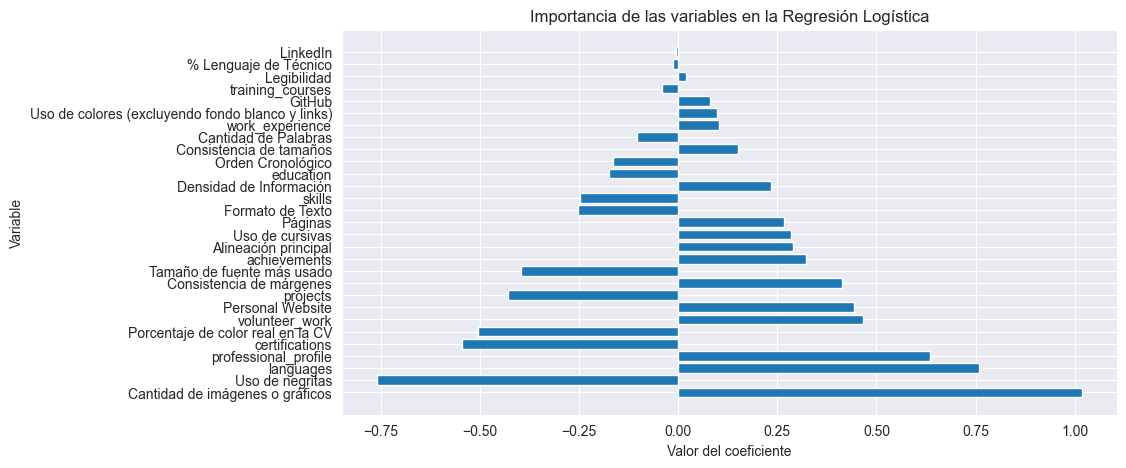

In [27]:
plt.figure(figsize=(10, 5))
plt.barh(coef["Variable"], coef["Coeficiente"])
plt.xlabel("Valor del coeficiente")
plt.ylabel("Variable")
plt.title("Importancia de las variables en la Regresión Logística")
plt.show()

### Usar Recursive feature elimination

In [28]:
selector = RFE(model, n_features_to_select=12)  # Cambia 5 según el número de variables que quieras conservar
selector.fit(X_train_scaled, y_train)

RFE(estimator=LogisticRegression(random_state=69), n_features_to_select=12)

In [29]:
selected_features = X_train.columns[selector.support_]
print("Variables seleccionadas:", selected_features)

Variables seleccionadas: Index(['professional_profile', 'certifications', 'achievements', 'languages',
       'projects', 'volunteer_work', 'Personal Website',
       'Tamaño de fuente más usado', 'Uso de negritas',
       'Porcentaje de color real en la CV', 'Cantidad de imágenes o gráficos',
       'Consistencia de márgenes'],
      dtype='object')


In [30]:
columns_to_keep = ['professional_profile', 'certifications', 'achievements', 'languages',
       'projects', 'volunteer_work', 'Personal Website',
       'Tamaño de fuente más usado', 'Uso de negritas',
       'Porcentaje de color real en la CV', 'Cantidad de imágenes o gráficos',
       'Consistencia de márgenes','Passed']

df_keepRL = df[columns_to_keep]

In [31]:
X_rl = df_keepRL.drop(columns=["Passed"])  # Eliminar la variable objetivo
y_rl = df_keepRL["Passed"]  # Variable objetivo

In [32]:
X_train_rl, X_test_rl, y_train_rl, y_test_rl = train_test_split(X_rl, y_rl, test_size=0.2, random_state=42, stratify=y)

# Revisar la nueva estructura de los datos
print("Forma de x_train:", X_train_rl.shape)
print("Forma de x_test:", X_test_rl.shape)
print("Forma de y_train:", y_train_rl.shape)
print("Forma de y:", y_test_rl.shape)

Forma de x_train: (501, 12)
Forma de x_test: (126, 12)
Forma de y_train: (501,)
Forma de y: (126,)


In [33]:
resultados_rl_keep = {
    "Regresión Logística": train_logistic_regression(X_train_rl, y_train_rl, X_test_rl, y_test_rl)
}

In [34]:
resultados_rl_keep

{'Regresión Logística': {'Accuracy': 0.5079365079365079,
  'Precision': 0.2631578947368421,
  'Recall': 0.09433962264150944,
  'F1-Score': 0.1388888888888889,
  'ROC': np.float64(0.4512794003618506)}}

In [35]:
X_train_scaled_rl = scaler.fit_transform(X_train_rl)
X_test_scaled_rl = scaler.transform(X_test_rl)

In [36]:
resultados_rl_keep = {
    "Regresión Logística": train_logistic_regression(X_train_scaled_rl, y_train_rl, X_test_scaled_rl, y_test_rl)
}

In [37]:
resultados_rl_keep

{'Regresión Logística': {'Accuracy': 0.5634920634920635,
  'Precision': 0.42857142857142855,
  'Recall': 0.11320754716981132,
  'F1-Score': 0.1791044776119403,
  'ROC': np.float64(0.5018092530369604)}}

---

### Árbol de decisión

In [38]:
def train_decision_tree(X_train, y_train, X_test, y_test):
    model = DecisionTreeClassifier(max_depth=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC": roc_auc_score(y_test, y_pred)
    }

resultados_ab = {
    "Arbol de decisión": train_decision_tree(X_train, y_train, X_test, y_test),
}

In [39]:
resultados_ab

{'Arbol de decisión': {'Accuracy': 0.5238095238095238,
  'Precision': 0.3157894736842105,
  'Recall': 0.11320754716981132,
  'F1-Score': 0.16666666666666666,
  'ROC': np.float64(0.46756267769449467)}}

#### Ajuste hiperparametros arbol

In [40]:
tree = DecisionTreeClassifier(class_weight="balanced", random_state=42)

param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_leaf": [1, 5, 10],
    "max_features": ["sqrt", "log2", None]
}

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring="f1", n_jobs=-1)
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10}


In [41]:
def train_decision_tree(X_train, y_train, X_test, y_test):
    model = DecisionTreeClassifier(max_depth=3, max_features='log2', min_samples_leaf=10)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC": roc_auc_score(y_test, y_pred)
    }

resultados_ab = {
    "Arbol de decisión": train_decision_tree(X_train, y_train, X_test, y_test),
}

In [42]:
resultados_ab

{'Arbol de decisión': {'Accuracy': 0.5476190476190477,
  'Precision': 0.16666666666666666,
  'Recall': 0.018867924528301886,
  'F1-Score': 0.03389830508474576,
  'ROC': np.float64(0.47518738692168516)}}

### Maquina de soporte vectorial

In [43]:
def train_svm(X_train, y_train, X_test, y_test):
    model = SVC(kernel="linear")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC": roc_auc_score(y_test, y_pred)
    }

resultados_msv = {
    "Maquina de soporte vectorial": train_svm(X_train, y_train, X_test, y_test),
}

In [44]:
resultados_msv

{'Maquina de soporte vectorial': {'Accuracy': 0.5396825396825397,
  'Precision': 0.3333333333333333,
  'Recall': 0.09433962264150944,
  'F1-Score': 0.14705882352941177,
  'ROC': np.float64(0.4786766606358232)}}

### Random forest

In [45]:
def train_random_forest(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(n_estimators=50, max_depth=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

resultados_rf = {
    "Random Forest": train_logistic_regression(X_train_scaled, y_train, X_test_scaled, y_test),
}

In [46]:
resultados_rf

{'Random Forest': {'Accuracy': 0.5476190476190477,
  'Precision': 0.4,
  'Recall': 0.1509433962264151,
  'F1-Score': 0.2191780821917808,
  'ROC': np.float64(0.4932799172912897)}}

### XGBoost

In [47]:
# Función para entrenar y evaluar XGBoost
def train_xgboost(X_train, y_train, X_test, y_test):
    model = XGBClassifier(n_estimators=50, max_depth=3, use_label_encoder=False, eval_metric="logloss")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    }

resultados_xgb = {
    "Random Forest": train_logistic_regression(X_train_scaled, y_train, X_test_scaled, y_test),
}

In [48]:
resultados_xgb

{'Random Forest': {'Accuracy': 0.5476190476190477,
  'Precision': 0.4,
  'Recall': 0.1509433962264151,
  'F1-Score': 0.2191780821917808,
  'ROC': np.float64(0.4932799172912897)}}